In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import glob

In [3]:
files = map(np.load, glob.glob("../export/data/physio_data*.npz"))

In [4]:
sessions_info = [ d["session_info"].tolist() for d in files ]
sid_list = map(int, [ s["sessionId"] for s in sessions_info ])

In [5]:
print sid_list

[10, 1206, 1588, 160, 1698, 1956, 2090, 2224, 2358, 2492, 2626, 2760, 2894, 3028, 3412, 3538, 3664, 3790, 426, 546, 814, 948]


In [6]:
signals_key = sorted([ k for k in files[0].keys() if k not in ("session_info") ])
print signals_key

['ecg', 'ecg_raw', 'eda', 'eda_raw', 'resp', 'resp_raw', 'skt', 'skt_raw']


In [7]:
def pad_and_stack(data_list):
    max_size = max(map(np.size, data_list))
    data_list = [ np.pad(data, (0,  max_size - data.size), mode='constant', constant_values=np.nan) for data in data_list ]
    return np.vstack(data_list).transpose()

In [8]:
signals = {}
for key in signals_key:
    signals[key] = pad_and_stack([ f[key] for f in files ])

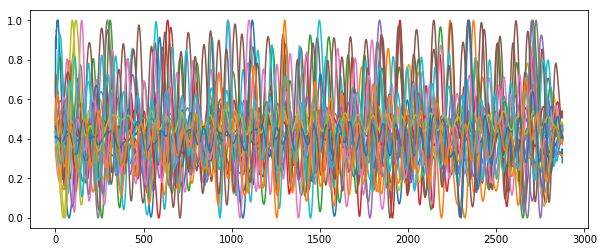

In [13]:
sig = pd.DataFrame(signals["resp"])
sig.plot(figsize=(10,4), legend=False)

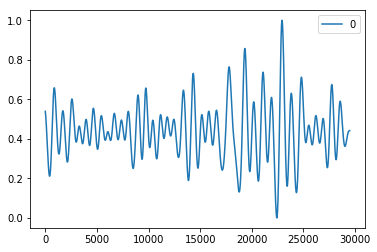

In [10]:
import biosppy

s = sig[1]

ts, filtered, zeros, resp_rate_ts, resp_rate = biosppy.signals.resp.resp(signal=s, sampling_rate=256, show=False)

# filtered = filtered.reshape(filtered.size,1)
# resp_rate = resp_rate.reshape(resp_rate.size,1)

d = pd.DataFrame((filtered - filtered.min()) / (filtered.max() - filtered.min()))
d.plot()